In [1]:
import h2o

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas

In [3]:
import os
input_csv = "/home/h2o/data/lending_club/LoanStats3a.csv"

In [4]:
os.path.exists(input_csv)

False

In [5]:
input_csv = "https://s3-us-west-2.amazonaws.com/h2o-tutorials/data/topics/lending/lending_club/LoanStats3a.csv"

In [7]:
h2o.connect() #or

Connecting to H2O server at http://localhost:54321 ... successful.


H2O cluster uptime:,8 days 21 hours 2 mins
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.8
H2O cluster version age:,1 month and 14 days
H2O cluster name:,H2O_from_python_felix_nh59a7
H2O cluster total nodes:,1
H2O cluster free memory:,2.517 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,8 days 21 hours 2 mins
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.8
H2O cluster version age:,1 month and 14 days
H2O cluster name:,H2O_from_python_felix_nh59a7
H2O cluster total nodes:,1
H2O cluster free memory:,2.517 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"locked, healthy"


In [9]:
loans = h2o.import_file(input_csv,
                        col_types = {"int_rate":"string", 
                                     "revol_util":"string", 
                                     "emp_length":"string", 
                                     "verification_status":"string"})

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
loans.dim

[42536, 52]

In [11]:
loans.head()

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
1.0775e+06,1.2966e+06,5000,5000,4975,36 months,10.65%,162.87,B,B2,,10+ years,RENT,24000,VERIFIED - income,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01 00:00:00,1,,,3,0,13648,83.7%,9,f,0,0,5861.07,5831.78,5000,861.07,0,0,0,2015-01-01 00:00:00,171.62,,2015-01-01 00:00:00,0,,1
1.07743e+06,1.31417e+06,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,VERIFIED - income source,2011-12-01 00:00:00,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces,car,bike,309xx,GA,1,0,1999-04-01 00:00:00,5,,,3,0,1687,9.4%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,2013-04-01 00:00:00,119.66,,2013-09-01 00:00:00,0,,1
1.07718e+06,1.31352e+06,2400,2400,2400,36 months,15.96%,84.33,C,C5,,10+ years,RENT,12252,not verified,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,,small_business,real estate business,606xx,IL,8.72,0,2001-11-01 00:00:00,2,,,2,0,2956,98.5%,10,f,0,0,3003.65,3003.65,2400,603.65,0,0,0,2014-06-01 00:00:00,649.91,,2015-06-01 00:00:00,0,,1
1.07686e+06,1.27718e+06,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.",other,personel,917xx,CA,20,0,1996-02-01 00:00:00,1,35,,10,0,5598,21%,37,f,0,0,12226.3,12226.3,10000,2209.33,16.97,0,0,2015-01-01 00:00:00,357.48,,2015-01-01 00:00:00,0,,1
1.07536e+06,1.31175e+06,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,VERIFIED - income source,2011-12-01 00:00:00,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.",other,Personal,972xx,OR,17.94,0,1996-01-01 00:00:00,0,38,,15,0,27783,53.9%,38,f,1168.04,1168.04,2767.64,2767.64,1831.96,935.68,0,0,0,2015-06-01 00:00:00,67.79,2015-07-01 00:00:00,2015-06-01 00:00:00,0,,1
1.07527e+06,1.31144e+06,5000,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanD

In [12]:
num_unfiltered_loans = loans.dim[0]
num_unfiltered_loans

42536

In [14]:
loans["loan_status"].table()

loan_status,Count
Charged Off,5435
Current,3351
Default,7
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Current,53
Does not meet the credit policy. Status:Fully Paid,1933
Does not meet the credit policy. Status:In Grace Period,2
Fully Paid,30843
In Grace Period,60
Late (16-30 days),16


In [15]:
ongoing_status = ["Current",
                  "In Grace Period",
                  "Late (16-30 days)",
                  "Late (31-120 days)",
                  "Does not meet the credit policy.  Status:Current",
                  "Does not meet the credit policy.  Status:In Grace Period"
                 ]

In [16]:
## Felix
loans["loan_status"].isin(ongoing_status) ## check if isIn is a data manipulation function

C1
0
0
0
0
1
0
1
0
0
0


In [17]:
loans = loans[~loans["loan_status"].isin(ongoing_status)]

In [18]:
loans.dim #felix

[38980, 52]

In [19]:
num_filtered_loans = loans.dim[0]
num_filtered_loans

38980

In [20]:
num_loans_filtered_out = num_unfiltered_loans - num_filtered_loans
num_loans_filtered_out

3556

In [21]:
loans["loan_status"].table().head(20)

loan_status,Count
Charged Off,5435
Default,7
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Fully Paid,1933
Fully Paid,30843


In [22]:
### CREATES A NEW COLUMN
fully_paid = ["Fully Paid",
              "Does not meet the credit policy.  Status:Fully Paid"
             ]
loans["bad_loan"] = ~(loans["loan_status"].isin(fully_paid))

In [23]:
loans["bad_loan"] = loans["bad_loan"].asfactor()

In [25]:
bad_loan_dist = loans["bad_loan"].table()
bad_loan_dist

bad_loan,Count
0,32776
1,6204


In [27]:
## Felix - 
print(type(bad_loan_dist)) ### TABLE returns a h2o frame
bad_loan_dist["Percentage"] = (100 * bad_loan_dist["Count"] / loans.nrow).round()
bad_loan_dist

<class 'h2o.frame.H2OFrame'>


bad_loan,Count,Percentage
0,32776,84
1,6204,16


In [28]:
loans[["int_rate", "revol_util", "emp_length"]].head()

int_rate,revol_util,emp_length
10.65%,83.7%,10+ years
15.27%,9.4%,< 1 year
15.96%,98.5%,10+ years
13.49%,21%,10+ years
7.90%,28.3%,3 years
18.64%,87.5%,9 years
21.28%,32.6%,4 years
12.69%,36.5%,< 1 year
14.65%,20.6%,5 years
12.69%,67.1%,10+ years


In [29]:
loans["int_rate"] = loans["int_rate"].gsub(pattern = "%", replacement = "") # strip %
loans["int_rate"] = loans["int_rate"].trim() # trim whitespace
loans["int_rate"] = loans["int_rate"].asnumeric() # change to numeric 

In [30]:
loans["revol_util"] = loans["revol_util"].gsub(pattern="%", replacement="") # strip %
loans["revol_util"] = loans["revol_util"].trim() # trim whitespace
loans["revol_util"] = loans["revol_util"].asnumeric() # change to numeric 

In [31]:
# Use gsub to remove " year" and " years"; also translate n/a to "" 
loans["emp_length"] = loans["emp_length"].gsub(pattern="([ ]*+[a-zA-Z].*)|(n/a)", replacement="") 
loans["emp_length"] = loans["emp_length"].trim() # trim whitespace

loans["emp_length"] = loans["emp_length"].gsub(pattern="< 1", replacement="0") # convert "< 1" to 0
loans["emp_length"] = loans["emp_length"].gsub(pattern="10\\+", replacement="10") # convert "10+" to 10
loans["emp_length"] = loans["emp_length"].asnumeric() # trim whitespace

In [32]:
loans[["int_rate", "revol_util", "emp_length"]].head()

int_rate,revol_util,emp_length
10.65,83.7,10
15.27,9.4,0
15.96,98.5,10
13.49,21,10
7.9,28.3,3
18.64,87.5,9
21.28,32.6,4
12.69,36.5,0
14.65,20.6,5
12.69,67.1,10


Bad Loans


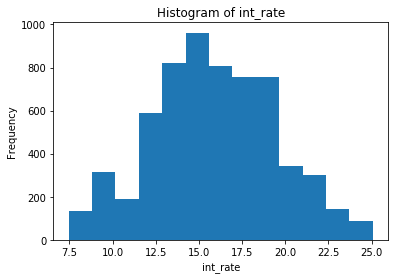

Good Loans


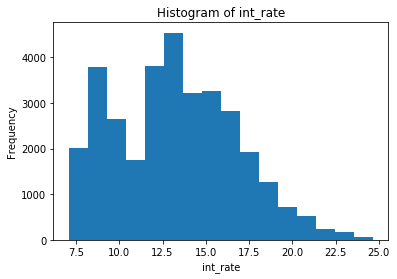

In [33]:
%matplotlib inline

print("Bad Loans")
loans[loans["bad_loan"] == "1", "int_rate"].hist()

print("Good Loans")
loans[loans["bad_loan"] == "0", "int_rate"].hist()

### As expected, the bad loan distribution contains proportionately more high interest rate loans than the distribution for good loans. Likewise, the good loan distribution contains a higher proportion of low interest rate loans than that for bad loans. It would not surprise us if interest rate were a strong predictor of loan performance.

### Financial institutions typically set a borrower's interest rate based on factors like estimated risk and customer demand. If the underwriting rules are any good at all, we would expect interest rate to be one of the best predictors of default.

In [34]:
loans["verification_status"].head()

verification_status
VERIFIED - income
VERIFIED - income source
not verified
VERIFIED - income source
VERIFIED - income source
VERIFIED - income source
VERIFIED - income source
VERIFIED - income
not verified
VERIFIED - income source


In [35]:
loans["verification_status"] = loans["verification_status"].sub(pattern="VERIFIED - income source", 
                                                                replacement="verified")
loans["verification_status"] = loans["verification_status"].sub(pattern="VERIFIED - income", 
                                                                replacement="verified")
loans["verification_status"] = loans["verification_status"].asfactor()

In [36]:
loans["verification_status"].table()

verification_status,Count
not verified,17947
verified,21032


# Feature Engineering

In [37]:
loans["credit_length"] = loans["issue_d"].year() - loans["earliest_cr_line"].year()
loans["credit_length"].head()

credit_length
26
12
10
15
7
4
7
7
13
22


In [38]:
loans["issue_d_year"] = loans["issue_d"].year()
loans["issue_d_month"] = loans["issue_d"].month().asfactor()

loans[["issue_d_year", "issue_d_month"]].head()

issue_d_year,issue_d_month
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12
2011,12


In [39]:
loans["desc"].head()

desc
Borrower added on 12/22/11 > I need to upgrade my business technologies.
Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces
""
"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time."
""
Borrower added on 12/16/11 > Downpayment for a car.
Borrower added on 12/21/11 > I own a small home-based judgment collection business. I have 5 years experience collecting debts. I am now going from a home office to a small office. I also plan to buy a small debt portfolio (eg. $10K for $1M of debt) My score is not A+ because I own my home and have no mortgage.
"Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother and have no car payment or credit cards. I am in community college and work full time. Im going to use the money to make some repairs around the house and get some maintenance done on my car. Borrower added on 12/20/11 > $1000 down only $4375 to go. Thanks to everyone that invested so far, looking forward to surprising my brother with the fixes around the house."
"Borrower added on 12/15/11 > I had recived a loan from Citi Financial about a year ago, I was paying 29.99 intrest, so the refinance is to cut that rate since cleaning up my credit I have been paying everything on time as shown on my credit report"
""


In [40]:
STOP_WORDS = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what",
              "there","all","we","one","the","a","an","of","or","in","for","by","on",
              "but","is","in","a","not","with","as","was","if","they","are","this","and","it","have",
              "from","at","my","be","by","not","that","to","from","com","org","like","likes","so"]

In [41]:
def tokenize(sentences, stop_word = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOP_WORDS)),:]
    return tokenized_words

words = tokenize(loans["desc"].ascharacter())

#### Then we train our Word2Vec model on the words extracted from our descriptions. We choose an output vector size of 100.

#### What does Word2Vec do? At a high level, it is a dimensionality reduction method for numerical representations of text. But it reduces dimensionality while preserving relationships between words in the text.

#### Suppose we were to create a dictionary of all the words in our descriptions, and further suppose that dictionary contained 2500 unique words. At one extreme, we could create an indicator variable for each word (i.e., one-hot encoding). This would yield 2500 new features that would certainly lead to massive overfitting of models.

#### At the other extreme, suppose we had someone classify those words into different groups and create indicator variables for each group: e.g., risky_words ("bankruptcy", "default", "forfeit", "lien", etc.), angry_words (profanity, "complaint", etc.), and so on. This reduces dimensionality by manually grouping words, but it is extremely labor intensive.

#### Word2Vec starts with the entire dictionary size  𝐾  as inputs and the selected vector size  𝑘  as the target number of outputs. Passing through the intermediate layer(s) of the Word2Vec neural net, a  𝑘 -dimensional numeric representation of each word is derived.

In [42]:
from h2o.estimators.word2vec import H2OWord2vecEstimator

w2v_model = H2OWord2vecEstimator(vec_size=100, model_id="w2v")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [43]:
w2v_model.find_synonyms("car", count=5)

OrderedDict([('prius', 0.7381044626235962),
             ('auto', 0.7254942655563354),
             ('vehicle', 0.72477787733078),
             ('camry', 0.7143995761871338),
             ('lexus', 0.6998257040977478)])

In [44]:
desc_vecs = w2v_model.transform(words, aggregate_method="AVERAGE")
desc_vecs.head()

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
0.079154,-0.0447813,0.0505317,0.0897037,0.124184,-0.0250219,0.18919,0.107293,0.246381,0.00467839,-0.0311293,0.048149,0.0764483,0.147782,-0.110558,-0.180712,0.0959883,0.0544713,-0.202164,-0.0911254,0.0837375,0.0382157,-0.0676286,-0.162032,-0.0487499,-0.190745,0.0834609,-0.142351,0.0592805,0.105694,-0.185222,0.0326838,-0.0635333,0.171137,0.103475,-0.0705905,-0.270784,-0.12342,-0.0309332,-0.0362219,0.00446411,-0.127862,-0.0130185,0.206753,0.149106,0.0745243,-0.0639472,0.293741,-0.156307,-0.156047,-0.0654688,0.106056,0.164138,0.0193068,-0.136654,-0.00234715,-0.0753536,-0.112908,-0.109102,-0.0633953,0.0966467,-0.0325013,0.00890482,-0.0189579,-0.093489,0.0191134,-0.00907771,-0.082282,0.146438,-0.232884,-0.0673262,0.0318635,0.245974,0.0250844,-0.00820557,-0.10959,0.189916,-0.0578075,-0.0614777,0.0683293,-0.0184256,-0.109839,-0.0482319,-0.00463072,0.00399777,-0.0882653,-0.130579,0.119297,-0.0912742,0.179555,-0.101205,0.0941942,-0.222289,0.0374214,0.117663,-0.327982,0.0441206,-0.181927,-0.0840103,-0.176265
-0.03384,-0.135204,0.130151,-0.0429125,0.0871704,0.0464006,0.198178,0.197832,0.147989,-0.00844141,-0.0335517,0.237389,0.068229,0.179557,-0.214996,-0.0152261,0.0550298,-0.00314113,-0.213111,-0.0910332,0.079375,0.029043,-0.133947,-0.0667134,-0.068088,-0.113756,0.0604988,-0.171984,-0.101564,0.0806407,-0.160388,0.177572,-0.158337,0.0496871,0.138072,-0.0620984,-0.0783115,-0.143242,-0.153024,-0.0363256,0.0619409,-0.140954,-0.0830065,0.0350653,0.0261091,0.0222007,-0.0600137,0.20108,0.0562449,-0.0850424,-0.0676248,0.051771,0.147824,0.0885536,-0.0514161,0.0145858,0.0402048,-0.0746612,-0.112811,-0.0809188,0.135375,0.0712575,0.0727032,-0.0323182,0.0226432,0.0992868,-0.0819124,-0.0649403,0.0159997,-0.12942,0.0680277,0.0156862,0.139515,0.0509948,0.0251681,0.0287326,0.0294503,0.0748333,-0.0666857,-0.0955911,0.0760943,0.0428429,-0.00339202,-0.0526406,0.00837786,-0.0962007,-0.199058,-0.0405264,-0.142862,0.0616813,-0.134936,0.0357432,-0.121609,-0.00262754,0.180845,-0.209339,0.039577,-0.196072,-0.0561974,-0.206696
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-0.0237933,-0.174663,0.11134,-0.040949,0.133245,0.145327,0.302087,0.207805,0.190606,0.0402139,-0.0300555,0.214352,0.0480197,0.215159,-0.141693,-0.0544578,-0.0352794,0.00664228,-0.147513,-0.0646562,0.076571,0.0137204,-0.0100215,-0.0286069,-0.0422896,-0.134221,0.0625905,-0.0942341,0.0384124,-0.0593825,-0.194199,0.177402,-0.185957,0.0244931,0.0711996,-0.0436283,-0.165557,-0.151753,-0.0993476,-0.0485771,0.0175815,-0.134968,-0.0143668,0.0873511,-0.0170219,0.0992848,-0.0893713,0.169049,0.0267033,-0.0298779,-0.103102,0.0648899,0.111092,0.0728826,-0.0326058,-0.000974047,0.173059,-0.0251366,-0.0963387,-0.0740858,0.0945555,0.115866,0.0744225,0.00154102,-0.0415205,0.0933452,0.0216062,-0.00614117,0.0474075,-0.148105,0.0419297,0.0563256,0.136678,0.0472417,0.00990904,-0.0126494,0.0474997,0.00510791,-0.0636005,-0.077212,0.0353537,0.0385423,-0.0562366,-0.12718,0.0625747,-0.0596657,-0.163752,0.0942956,-0.134014,0.0429058,-0.0595331,0.185199,-0.153026,0.0863614,0.0726354,-0.24318,-0.0022342,-0.313871,-0.00577697,-0.167664
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

In [45]:
loans = loans.cbind(desc_vecs)

In [46]:
type(desc_vecs)

h2o.frame.H2OFrame